In [25]:
#Gdrive mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Question 2**

In [26]:
#Train data read
import pandas as pd
import numpy as np
data=pd.read_csv(r"/content/drive/MyDrive/Train.csv")
data=np.array(data)
print(data.shape)

(9999, 101)


In [27]:
#test data read
data_test=pd.read_csv(r"/content/drive/MyDrive/test.csv")
data_test=np.array(data_test)
print(data_test.shape)

(499, 101)


In [28]:
#Normalization
def normalization(X):
    #mean of each feature
    means = np.array([np.mean(X[:,i]) for i in range(X.shape[1])])
    
    
    #standard deviation of each feature
    stddevs = np.array([np.std(X[:,i]) for i in range(X.shape[1])])
        
    normal_=[]
    #z=(x-mu)/std
    for i in range (X.shape[1]):
      mu=means[i]
      s=stddevs[i]
      normalized = (X[:,i]-mu)/s
      normal_.append(normalized)
    normal_=np.transpose(np.array(normal_))
    
    return normal_

In [29]:
#Gradient Descend
def gradient_desc(W,X,Y):
  alpha=0.0001
  grad_W=np.matmul(np.transpose(X),(np.matmul(X,W)-Y))
  W=W-alpha*grad_W/X.shape[0]
  
  return W

In [30]:
#Mean Square Error
def mse(Y,Y_pred):
  a=Y_pred-Y
  x=np.matmul(np.transpose(a),a)
  return x[0][0]/Y.shape[0]

In [31]:
#Ridge Regression
def ridge_reg (W,X,Y,lambda_):
  alpha=0.0001
  g=np.matmul(np.transpose(X),(np.matmul(X,W)-Y))

  grad_W=g/X.shape[0]+lambda_*W
  
  W=W-alpha*grad_W
  
  return W

Analytical method:
Validation error 2.0996507102711436e+16

Gradient Descent:
Validation error= 4.2396132898979


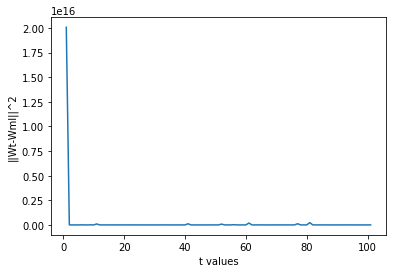

Minimum ||Wt-Wml||^2= [4258897.39190971]


In [32]:
from pandas.core.api import notnull

import numpy as np
import matplotlib.pyplot as plt
d=[0, 1, 2, 10];
error=[]

#Splitting of data
X=data[0:8000][:,:100]
Y=data[0:8000][:,100]
X_val=data[8000:9999][:,:100]
Y_val=data[8000:9999][:,100]
X_test=data_test[:,:100]
Y_test=data_test[:,100]
X=np.array(X).reshape(8000,100)
Y=np.array(Y).reshape(8000,1)
X_val=np.array(X_val).reshape(1999,100)
Y_val=np.array(Y_val).reshape(1999,1)
X_test=np.array(X_test).reshape(499,100)
Y_test=np.array(Y_test).reshape(499,1)
#Normalization of data
X_=normalization(X)
X_val_=normalization(X_val)
X_test_=normalization(X_test)

# X=[1 x] x=data matrix
X_new=np.ones((X_.shape[0],1))
X_new=np.column_stack((X_new,X_))
X_val_new=np.ones((X_val_.shape[0],1))
X_val_new=np.column_stack((X_val_new,X_val_))
X_test_new=np.ones((X_test_.shape[0],1))
X_test_new=np.column_stack((X_test_new,X_test_))
#Analytical method
W_1=np.matmul(np.matmul(np.matmul(np.transpose(X_new),X_new),np.transpose(X_new)),Y)
## Validation for analytical method
Y_val_pred=np.matmul(X_val_new,W_1)
error_1=mse(Y_val,Y_val_pred)
print('Analytical method:')
print("Validation error",error_1)
##Gradient Descent Method
W_2=np.zeros((X_new.shape[1],1))
print('\nGradient Descent:')
#First epoch might not be able to obtain the optimal value
for epoch in range (1000):
    W_new=gradient_desc(W_2,X_new,Y)
    #Traing data prediction
    Y_pred=np.matmul(X_new,W_new)
    
    W_2=W_new
    #Validation data prediction
    Y_val_pred=np.matmul(X_val_new,W_new)
error_2=mse(Y_val,Y_val_pred)  
print("Validation error=",error_2)
#Calculation of ||Wt- Wml||^2
t=[]
W_diff=[]
for i in range (101):
  W_diff.append((W_1[i]-W_2[i])**2)
  t.append(i+1)
plt.plot(t,W_diff)
plt.xlabel("t values")
plt.ylabel("||Wt-Wml||^2")
# Plot of ||Wt -Wml||^2 vas t values
plt.show()
print("Minimum ||Wt-Wml||^2=",min(W_diff))

The observation from the above plot are such that:

i) some initial squared differences between *W_ml* and *W_t* values are much higher than the rest.

ii) But the squared difference remains quite high throughout with the minimum value being=4258897(approx).

iii) If viewed carefully we can see certain spikes in the line running parallel to x axis. So, we can make another observations there are certain squared difference values  which will be higher than the rest but much lower than the initial ||Wt- Wml||^2 values.


Ridge Regression
Validation error= 3.130278313192314


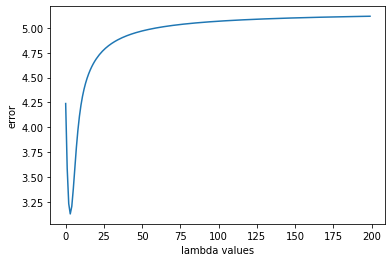

In [24]:
#Ridge Regression

#Initializing weights
W_3=np.zeros((X_new.shape[1],1))
error_3=[]
print('\nRidge Regression')
#Initializing a range of lambda values
lambda_=np.arange(0,200)
# Computing ridge regression for each lambda value
for l in range(len(lambda_)):
  # The first epoch might not be able to reach to the optimal W value 
  for epoch in range (1000):
   
      W_new=ridge_reg(W_3,X_new,Y,lambda_[l])
      #Training data prediction
      Y_pred=np.matmul(X_new,W_new)
      
      W_3=W_new
      #Validation data prediction
      Y_val_pred=np.matmul(X_val_new,W_new)
  #error list contain all validation error for each lambda value
  error_3.append(mse(Y_val,Y_val_pred))

  # Optimal W_r value for optimal lambda
  min_error=min(error_3)
  if min_error==error_3[-1]:
    W_r=W_3

print("Validation error=",min_error)
#Plotting validation error vs lambda
plt.plot(lambda_,error_3)
plt.xlabel("lambda values")
plt.ylabel("error")

plt.show()

In [22]:
Y_test_ml=np.matmul(X_test_new,W_1)
Y_test_r=np.matmul(X_test_new,W_r)
print("Cross validation on test data:")
print("MSE for W_ml=",mse(Y_test,Y_test_ml))
print("MSE for W_r=",mse(Y_test,Y_test_r))


Cross validation on test data:
MSE for W_ml= 2.0937179853825532e+16
MSE for W_r= 3.1551866178419665


We can see from the Mean Squared Error calculation that error for W_ml is of the order 10^16 ,whereas, for W_r is just 3.15518 when calculated on test data.

So a better choice would be Ridge Regression over Analytical Method.

The reason for it is analytical method becomes unreliable when the dataset is too huge feature wise and sample wise. Whereas, ridge regression is can improve the model's predictive accuracy: By reducing overfitting and improving the model's generalization performance, ridge regression can often produce more accurate predictions on new data compared to the analytical method.